# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

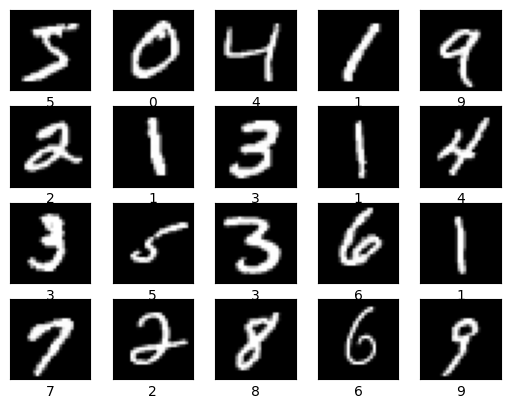

In [1]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree,
)

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=y[i])




### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [2]:


SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
)

In [ ]:




# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],  # Inverse of regularization strength
    'penalty': ['l1'],  # L1 regularization for sparsity
    'solver': ['saga'],  # Solver that supports L1
    'max_iter': [1, 10,100]
}

# Perform grid search with cross-validation
print("Performing grid search...")
grid_search = GridSearchCV(
    LogisticRegression(multi_class='ovr', random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Evaluate model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate sparsity for each class
sparsity = []
for i in range(10):
    weights = best_model.coef_[i]
    sparsity.append(np.mean(weights == 0))
print("\nSparsity (proportion of zero weights) for each class:")
for digit, sparse_ratio in enumerate(sparsity):
    print(f"Digit {digit}: {sparse_ratio:.3f}")

# Visualize classification vectors
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    weights = best_model.coef_[i].reshape(28, 28)
    plt.imshow(weights, cmap='seismic', interpolation='nearest')
    plt.title(f'Digit {i}')
    plt.colorbar()
plt.tight_layout()
plt.show()

# Plot sparsity patterns
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    weights = best_model.coef_[i]
    plt.spy(weights.reshape(1, -1), markersize=1)
    plt.title(f'Sparsity Pattern\nDigit {i}')
plt.tight_layout()
plt.show()

# user a scaler : 
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb 

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.


Number of components needed for 80% variance: 148


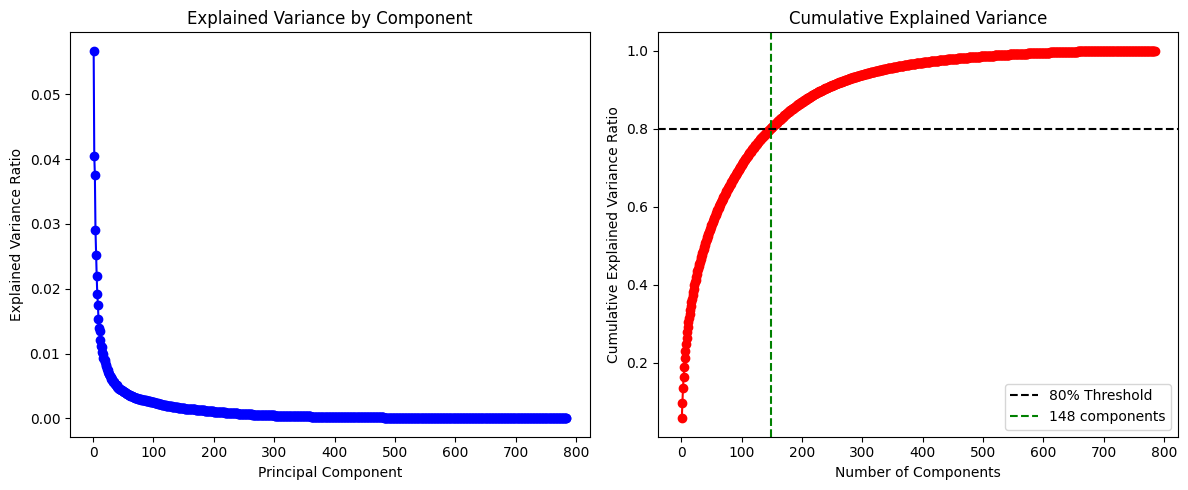

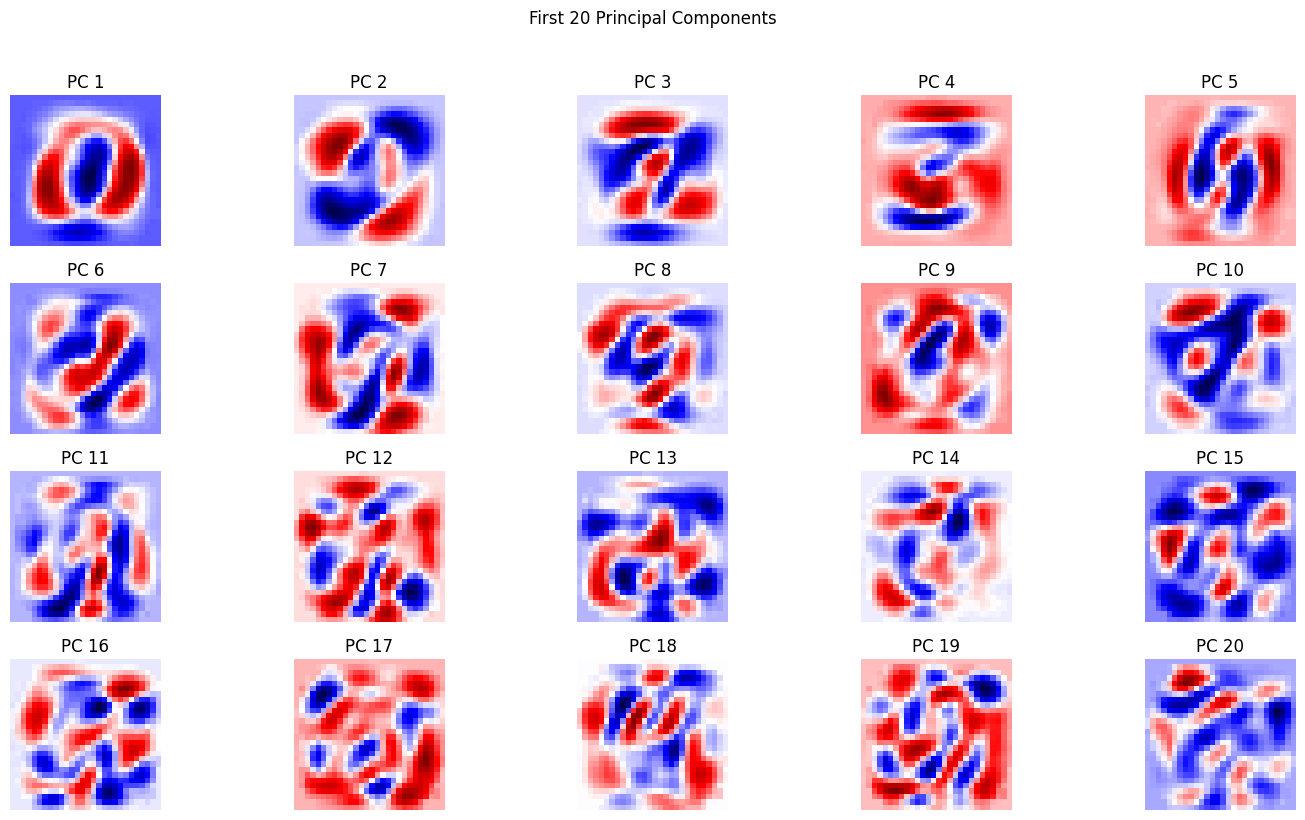

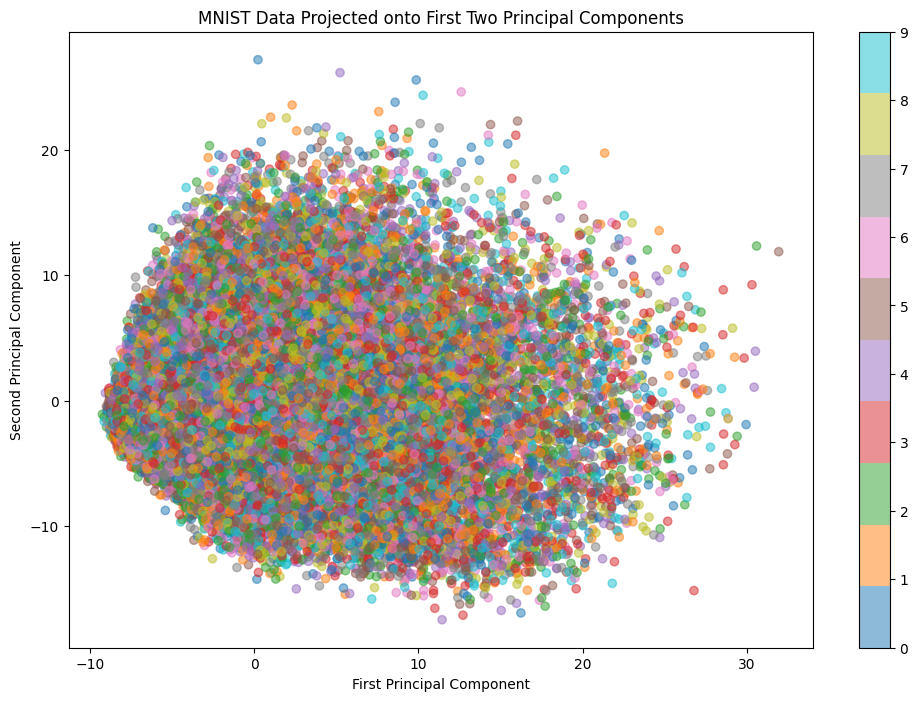

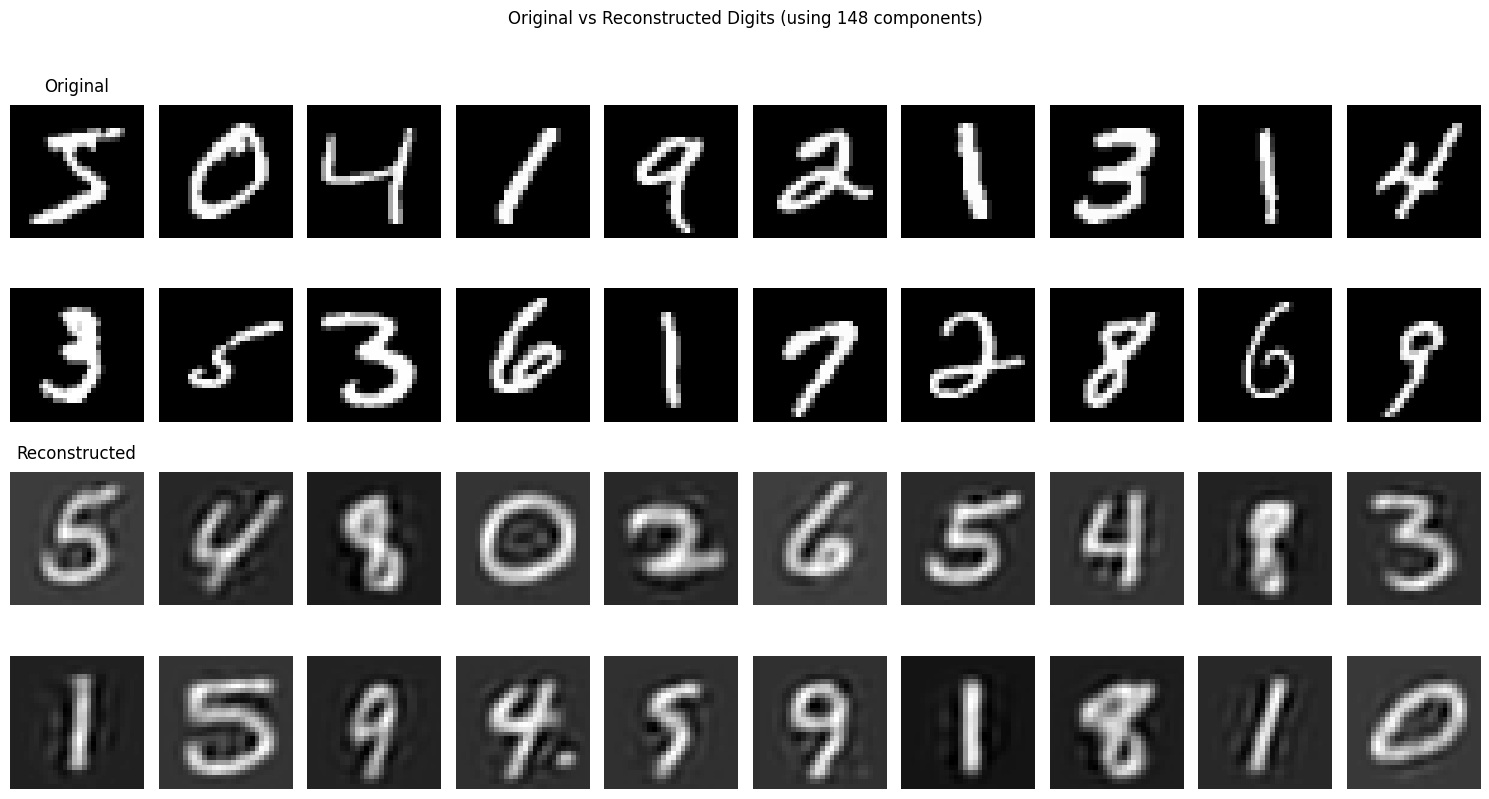


PCA Analysis Summary:
Total number of components: 784
Explained variance ratio of first 5 components: [0.05674894 0.04052038 0.03759499 0.02907834 0.02528556]
Cumulative explained variance of first 5 components: [0.05674894 0.09726933 0.13486432 0.16394266 0.18922822]


In [5]:
# 1. Determine components for 80% variance and create PCA object
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"\nNumber of components needed for 80% variance: {n_components_80}")

# 2. Plot explained variance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.8, color='k', linestyle='--', label='80% Threshold')
plt.axvline(x=n_components_80, color='g', linestyle='--', 
            label=f'{n_components_80} components')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Visualize first 20 principal components' loadings
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='seismic')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.suptitle('First 20 Principal Components', y=1.02)
plt.tight_layout()
plt.show()

# 4. Plot first two principal components
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_train_scaled)

# Ensure y has the same length as X_pca
y_subset = y[:X_pca.shape[0]]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), 
                      cmap='tab10', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Data Projected onto First Two Principal Components')
plt.show()

# 5. Visualize reconstructed digits
# Create PCA with number of components for 80% variance
pca_reconstruction = PCA(n_components=n_components_80)
X_reduced = pca_reconstruction.fit_transform(X_train_scaled)
X_reconstructed = pca_reconstruction.inverse_transform(X_reduced)
X_reconstructed = scaler.inverse_transform(X_reconstructed)

# Plot original vs reconstructed digits
plt.figure(figsize=(15, 8))
for i in range(20):
    # Original digit
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original', pad=10)
    
    # Reconstructed digit
    plt.subplot(4, 10, i + 21)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Reconstructed', pad=10)

plt.suptitle(f'Original vs Reconstructed Digits (using {n_components_80} components)', y=1.02)
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nPCA Analysis Summary:")
print(f"Total number of components: {pca.n_components_}")
print(f"Explained variance ratio of first 5 components: {pca.explained_variance_ratio_[:5]}")
print(f"Cumulative explained variance of first 5 components: {cumulative_variance_ratio[:5]}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load and preprocess MNIST data
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.astype('float32')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# 1. Classic visualization with diverging colormap
plt.figure(figsize=(15, 8))
plt.suptitle('First 20 Principal Components (Diverging Colormap)', y=1.02, size=14)
for i in range(20):
    plt.subplot(4, 5, i + 1)
    component = pca.components_[i].reshape(28, 28)
    vmax = np.abs(component).max()
    plt.imshow(component, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
    plt.title(f'PC {i+1}\n{pca.explained_variance_ratio_[i]:.1%}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Positive and negative contributions separately
plt.figure(figsize=(15, 12))
plt.suptitle('Positive and Negative Contributions of First 20 PCs', y=1.02, size=14)
for i in range(20):
    component = pca.components_[i].reshape(28, 28)
    
    # Positive contributions
    plt.subplot(5, 8, 2*i + 1)
    pos_comp = np.maximum(component, 0)
    plt.imshow(pos_comp, cmap='Reds')
    plt.title(f'PC {i+1} (+)')
    plt.axis('off')
    
    # Negative contributions
    plt.subplot(5, 8, 2*i + 2)
    neg_comp = np.absolute(np.minimum(component, 0))
    plt.imshow(neg_comp, cmap='Blues')
    plt.title(f'PC {i+1} (-)')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Heatmap of component correlations
plt.figure(figsize=(12, 10))
correlations = np.corrcoef(pca.components_[:20])
mask = np.triu(np.ones_like(correlations), k=1)
sns.heatmap(correlations, mask=mask, center=0, cmap='RdBu_r', 
            annot=True, fmt='.2f', square=True, vmin=-1, vmax=1)
plt.title('Correlations between First 20 Principal Components')
plt.show()

# 4. Distribution of weights
plt.figure(figsize=(15, 10))
plt.suptitle('Weight Distributions in First 20 Principal Components', y=1.02, size=14)
for i in range(20):
    plt.subplot(4, 5, i + 1)
    weights = pca.components_[i]
    plt.hist(weights, bins=50, color='skyblue', alpha=0.7)
    plt.title(f'PC {i+1}')
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Cumulative explained variance
plt.figure(figsize=(10, 6))
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 21), cumulative_variance_ratio[:20], 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by First 20 Components')
plt.grid(True)
plt.show()

# Print additional statistics
print("\nPCA Components Summary:")
for i in range(20):
    component = pca.components_[i]
    print(f"\nPC {i+1}:")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_[i]:.4f}")
    print(f"Max absolute weight: {np.abs(component).max():.4f}")
    print(f"Mean weight: {np.mean(component):.4f}")
    print(f"Std of weights: {np.std(component):.4f}")

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

ValueError: num must be an integer with 1 <= num <= 120, not 121

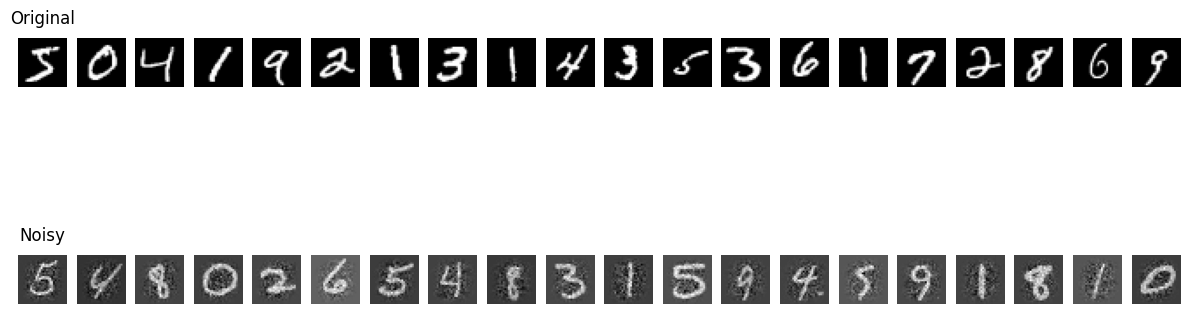

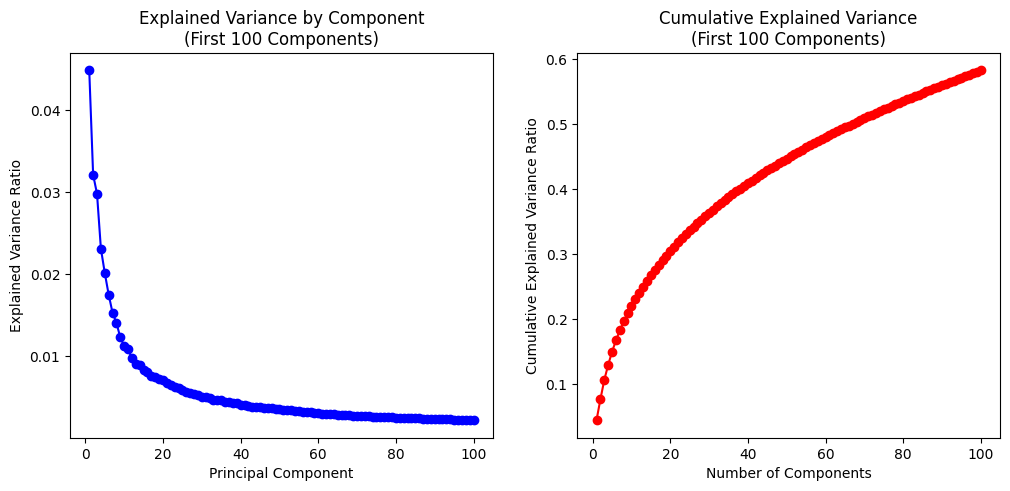

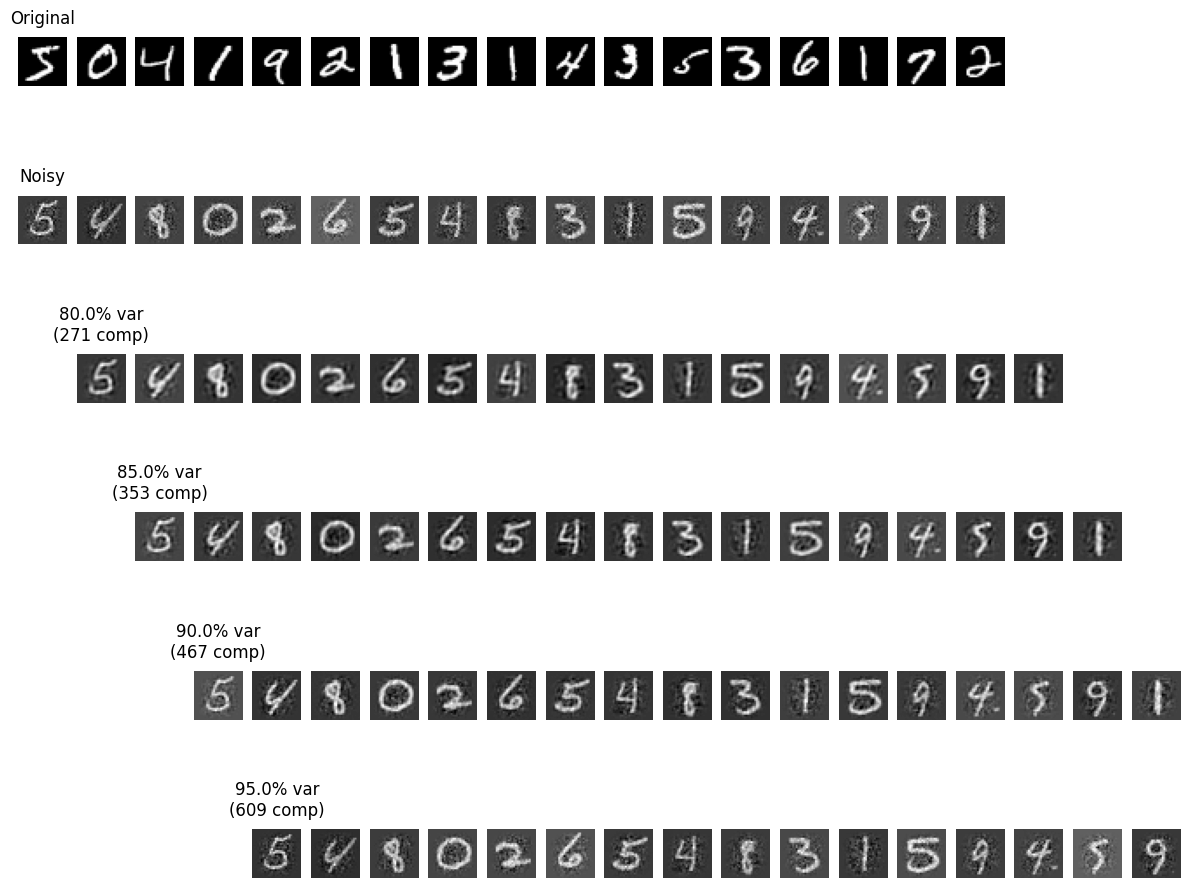

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


noise_scale = 0.5  # Adjust this to control noise intensity
X_noisy = X_train_scaled + np.random.normal(0, noise_scale, X_train_scaled.shape)

# Convert back to original scale for visualization
X_noisy_original = scaler.inverse_transform(X_noisy)

# Visualize original vs noisy digits
plt.figure(figsize=(15, 8))
for i in range(20):
    # Original digit
    plt.subplot(3, 20, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original', pad=10)
    
    # Noisy digit
    plt.subplot(3, 20, i + 21)
    plt.imshow(X_noisy_original[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Noisy', pad=10)

# Analyze variance explained by components for noisy data
pca = PCA()
pca.fit(X_noisy)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance for noisy data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), pca.explained_variance_ratio_[:100], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component\n(First 100 Components)')

plt.subplot(1, 2, 2)
plt.plot(range(1, 101), cumulative_variance_ratio[:100], 'ro-')
plt.xlabel('Number of Components')

plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance\n(First 100 Components)')

# Try different variance thresholds for denoising
variance_thresholds = [0.8, 0.85, 0.9, 0.95]
n_components = [np.argmax(cumulative_variance_ratio >= thresh) + 1 
               for thresh in variance_thresholds]

# Create denoised versions with different thresholds
denoised_results = []
for n_comp in n_components:
    pca_denoise = PCA(n_components=n_comp)
    X_reduced = pca_denoise.fit_transform(X_noisy)
    X_denoised_scaled = pca_denoise.inverse_transform(X_reduced)
    X_denoised = scaler.inverse_transform(X_denoised_scaled)
    denoised_results.append(X_denoised)

# Visualize denoising results with different variance thresholds
plt.figure(figsize=(15, 12))
for i in range(20):
    # Original
    plt.subplot(6, 20, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original', pad=10)
    
    # Noisy
    plt.subplot(6, 20, i + 21)
    plt.imshow(X_noisy_original[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Noisy', pad=10)
    
    # Denoised versions
    for idx, (thresh, denoised) in enumerate(zip(variance_thresholds, denoised_results)):
        plt.subplot(6, 20, i + (idx + 2) * 21)
        plt.imshow(denoised[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f'{thresh*100}% var\n({n_components[idx]} comp)', pad=10)

plt.suptitle('Original vs Noisy vs Denoised (with different variance thresholds)', y=0.98)
plt.tight_layout()
plt.show()

# Calculate and print MSE for each denoising threshold
print("\nMean Squared Error between original and denoised images:")
for thresh, denoised in zip(variance_thresholds, denoised_results):
    mse = np.mean((X - denoised) ** 2)
    print(f"Variance threshold {thresh*100}%: MSE = {mse:.4f}")

# Select best threshold based on visual inspection and MSE
best_threshold_idx = 2  # This will be determined by results
best_denoised = denoised_results[best_threshold_idx]

# Final visualization of best results
plt.figure(figsize=(15, 8))
for i in range(20):
    # Original digit
    plt.subplot(3, 20, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original', pad=10)
    
    # Noisy digit
    plt.subplot(3, 20, i + 21)
    plt.imshow(X_noisy_original[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Noisy', pad=10)
    
    # Denoised digit
    plt.subplot(3, 20, i + 41)
    plt.imshow(best_denoised[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title(f'Denoised\n({n_components[best_threshold_idx]} comp)', pad=10)

plt.suptitle('Final Results: Original vs Noisy vs Best Denoised', y=0.98)
plt.tight_layout()
plt.show()

# 5. Visualize reconstructed digits
# Create PCA with number of components for 80% variance
pca_reconstruction = PCA(n_components=n_components_80)
X_reduced = pca_reconstruction.fit_transform(X_train_scaled)
X_reconstructed = pca_reconstruction.inverse_transform(X_reduced)
X_reconstructed = scaler.inverse_transform(X_reconstructed)

# Plot original vs reconstructed digits
plt.figure(figsize=(15, 8))
for i in range(20):
    # Original digit
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original', pad=10)
    
    # Reconstructed digit
    plt.subplot(4, 10, i + 21)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Reconstructed', pad=10)

plt.suptitle(f'Original vs Reconstructed Digits (using {n_components_80} components)', y=1.02)
plt.tight_layout()
plt.show()

# Denoised versions
variance_thresholds = [0.8, 0.9, 0.95]
denoised_results = [X_reconstructed]  # Assuming you have denoised results for different thresholds

plt.figure(figsize=(15, 12))
for i in range(20):
    for idx, (thresh, denoised) in enumerate(zip(variance_thresholds, denoised_results)):
        plt.subplot(6, 20, i + 1 + idx * 20)
        plt.imshow(denoised[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f'Denoised {thresh*100:.0f}%', pad=10)

plt.suptitle('Original vs Denoised Digits', y=1.02)
plt.tight_layout()
plt.show()